<a href="https://colab.research.google.com/github/Shruti211232/Bharat-Intern2/blob/main/cat_dog_classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,MaxPooling2D,Dropout

In [ ]:
#generators -create batches
train_ds =keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds= keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#creating CNN Model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense (128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense (1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 101ms/step - loss: 1.3685 - accuracy: 0.5594 - val_loss: 0.9672 - val_accuracy: 0.6066
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6797 - accuracy: 0.5924 - val_loss: 0.6649 - val_accuracy: 0.5772
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6246 - accuracy: 0.6336 - val_loss: 0.6352 - val_accuracy: 0.6814
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5299 - accuracy: 0.7269 - val_loss: 0.5242 - val_accuracy: 0.7570
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4583 - accuracy: 0.7785 - val_loss: 0.4850 - val_accuracy: 0.7580
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4105 - accuracy: 0.8066 - val_loss: 0.4103 - val_accuracy: 0.8038
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3567 - accuracy: 0.8342 - val_loss: 0.5287 - val_ac

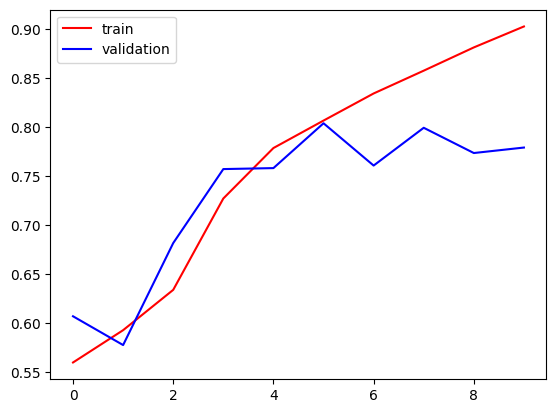

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

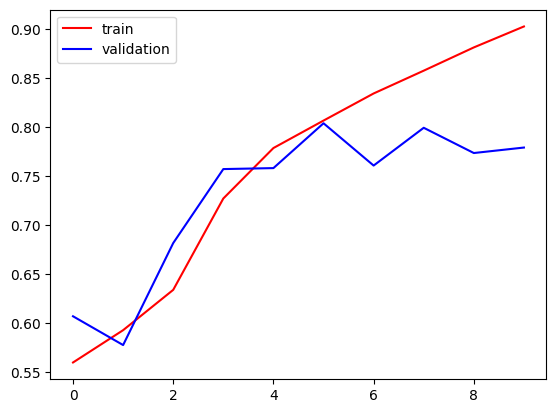

In [ ]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
#need to reduce complexity
#add more data
#reduce complexity
import cv2

In [ ]:
test_image=cv2.imread('/content/cat.jpg')

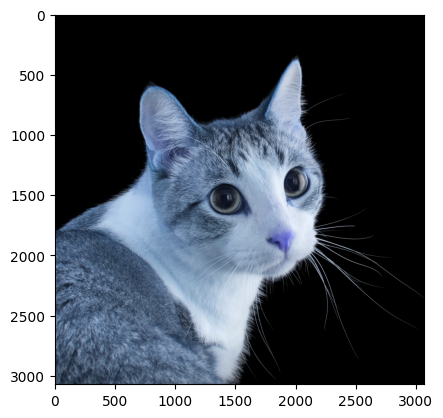

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape
test_image=cv2.resize(test_image,(256,256))
test_input = test_image.reshape(1,256,256,3)
model.predict(test_input)

1/1 [==============================] - 0s 479ms/step


array([[0.]], dtype=float32)

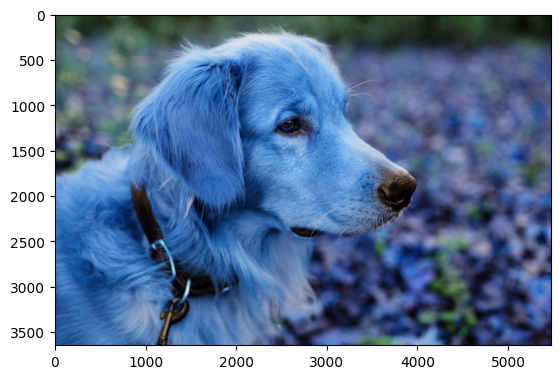

In [ ]:
test_image2=cv2.imread('/content/dog.jpg')
plt.imshow(test_image2)

In [ ]:
test_image2.shape
test_image2=cv2.resize(test_image,(256,256))
test_input = test_image2.reshape(1,256,256,3)
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)